# Devoir finale : Python for Data Analisys
MEU-Mobile KSD Data Set 

Sabri LACHIHAB IBO 3

# Importation des librairies pour le projet

In [140]:
# Pandas pour traiter le dataset
import pandas as pd
# Librairies nécessaires pour effectuer le scrapping de la page web
import os
import requests 
from bs4 import BeautifulSoup
from urllib.parse import unquote
# Pour la visualisation des graphiques
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Effectuer le model et le tester et chercher ses hyperparamètres
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Visualisation du rapport de la grid search
from time import time
import numpy as np
# Sauvegarder le modele obtenu à la fin
import pickle

# Téléchargement via webscrapping de la base de donnée sur le pc local 

In [142]:
# Recupuerer le code html de la page qui nous intéresste 
url = "https://archive.ics.uci.edu/ml/datasets/MEU-Mobile+KSD#"
base_url = "https://archive.ics.uci.edu/ml/"
requete = requests.get(url)
page = requete.content
soup = BeautifulSoup(page,'lxml')
html = soup.find_all('a')

# Fonction permettant de recuperer le lien du data folder du site (page contenant le lien du dataset) 
def url_data_folder(html):
    for balise in html:
        if(balise.get_text()=='Data Folder'):
            href = balise.get('href')
            new_url = base_url + href.split("./")[1]
            return new_url
        
url_data = url_data_folder(html)

# fonction permettant de recuperer le lien du fichier à télécharger sur le pc local
def scrapping_data_folder(url):
    requete = requests.get(url)
    page = requete.content
    soup = BeautifulSoup(page,'lxml')
    balise_td = soup.find_all('td')
    array_url_to_download = []
    for item_tr in balise_td:
        text = item_tr.get_text().strip()
        if(text != '' and text != 'Parent Directory'):
            balise_a = item_tr.find('a')
            if(balise_a!=None):
                array_url_to_download.append(url+balise_a.get('href'))
    return array_url_to_download
         
print('l\'url à télécharger\n')
array_url_to_download = scrapping_data_folder(url_data)
print(array_url_to_download)

# fonction permettant de télécharger le fichier sur le pc local
def download_file(array):
    for url in array:
        r = requests.get(url)
        new_url = unquote(url)
        with open(new_url.split('00399/')[1], 'wb') as f:
            f.write(r.content)
        print('Download finished of '+new_url.split('00399/')[1])
        
download_file(array_url_to_download)

l'url à télécharger

['https://archive.ics.uci.edu/ml/machine-learning-databases/00399/MEU-Mobile%20KSD%202016.xlsx']
Download finished of MEU-Mobile KSD 2016.xlsx


# Data-préparation (pandas)

Notre base de données est le fichier 'MEU-Mobile KSD 2016.xlsx' qu'on téléchargé précédament 

### Initialisation de notre dataframe

In [147]:
df = pd.read_excel("MEU-Mobile KSD 2016.xlsx")

### Nettoyage de notre dataframe

In [148]:
#Suppression des 2 premieres lignes du fichier
df = df.drop([0, 1]).reset_index(drop=True)

# Modification des noms des colomnes
column_names = list(df.iloc[0].values)
mapping = {df.columns.values[i]: column_names[i] for i in range(len(column_names))}
df = df.rename(columns=mapping).drop([0]).reset_index(drop=True)

# Nettoyage des valeures nulles
df = df.dropna()

# Suppression des lignes vides
filterDF = df["Subject"] != ""
df = dfs[filterDF]

#Visualisation des 5 premieres lignes du dataframe
df.head()

,Subject,Hold .,Hold t,Hold i,Hold e,Hold Shift,Hold 5,Hold Shift,Hold Caps,Hold r,...,Size Caps,Size r,Size o,Size a,Size n,Size l,Size Enter,AvH,AvP,AvA
0,1.0,89.0,92.0,64.0,85.0,123.0,82.0,70.0,101.0,84.0,...,0.225806,0.225806,0.322581,0.290323,0.225806,0.354839,0.258065,88.071429,0.190971,0.288018
1,1.0,90.0,88.0,99.0,83.0,123.0,101.0,81.0,94.0,88.0,...,0.225806,0.225806,0.322581,0.322581,0.258065,0.387097,0.322581,92.071429,0.186514,0.274194
2,1.0,87.0,90.0,83.0,65.0,79.0,73.0,96.0,62.0,64.0,...,0.225806,0.193548,0.290323,0.322581,0.225806,0.258065,0.225806,83.571429,0.186171,0.271889
3,1.0,71.0,81.0,62.0,72.0,83.0,94.0,89.0,104.0,73.0,...,0.225806,0.225806,0.258065,0.290323,0.225806,0.322581,0.322581,81.428571,0.177943,0.278802
4,1.0,89.0,72.0,82.0,82.0,62.0,89.0,68.0,88.0,69.0,...,0.290323,0.225806,0.322581,0.258065,0.225806,0.290323,0.387097,77.428571,0.163200,0.283410


# Data-visualisation des données

### Description du dataset

In [154]:
df.describe()

,Subject,Hold .,Hold t,Hold i,Hold e,Hold Shift,Hold 5,Hold Shift,Hold Caps,Hold r,...,Size Caps,Size r,Size o,Size a,Size n,Size l,Size Enter,AvH,AvP,AvA
count,2856.00000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,...,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000
mean,28.50000,94.817577,89.774860,91.097689,87.083333,91.549370,84.568978,93.727941,86.810924,86.292717,...,0.260222,0.268264,0.326895,0.306576,0.283320,0.299980,0.362429,89.292267,0.217467,0.305760
std,16.16606,23.236046,20.987113,22.992405,20.687536,22.757913,18.968962,22.184260,21.014413,19.645914,...,0.062298,0.061430,0.105392,0.094083,0.076654,0.095267,0.122663,15.540854,0.103830,0.061332
min,1.00000,18.000000,20.000000,20.000000,9.000000,19.000000,18.000000,18.000000,16.000000,20.000000,...,0.064516,0.096774,0.096774,0.064516,0.129032,0.096774,0.096774,52.071429,0.044229,0.138249
25%,14.75000,80.000000,75.000000,75.000000,73.000000,77.000000,73.000000,79.000000,71.000000,73.000000,...,0.225806,0.225806,0.258065,0.258065,0.225806,0.258065,0.290323,78.714286,0.127200,0.262673
50%,28.50000,92.000000,89.000000,90.000000,86.000000,89.000000,83.000000,92.000000,87.000000,85.000000,...,0.258065,0.258065,0.290323,0.290323,0.290323,0.290323,0.322581,88.071429,0.201771,0.297235
75%,42.25000,108.000000,102.000000,103.000000,100.000000,106.000000,95.000000,107.000000,99.000000,99.000000,...,0.290323,0.290323,0.387097,0.354839,0.322581,0.322581,0.419355,98.375000,0.294600,0.347926
max,56.00000,226.000000,226.000000,252.000000,242.000000,203.000000,170.000000,213.000000,186.000000,166.000000,...,0.548387,0.709677,1.000000,1.000000,0.935484,1.000000,1.000000,153.214286,0.603086,0.525346


On peut voir qu'on a 56 subjets pour 71(72-1) features dans ce dataset

On a 2856 mesures qui a été effectués



### Nombres de mesures par subject

In [163]:
print(df.Subject.value_counts())

55.0    51
53.0    51
26.0    51
25.0    51
24.0    51
23.0    51
22.0    51
21.0    51
20.0    51
19.0    51
18.0    51
17.0    51
16.0    51
15.0    51
14.0    51
13.0    51
12.0    51
11.0    51
10.0    51
9.0     51
8.0     51
7.0     51
6.0     51
5.0     51
4.0     51
3.0     51
2.0     51
27.0    51
28.0    51
29.0    51
54.0    51
51.0    51
49.0    51
47.0    51
45.0    51
43.0    51
41.0    51
39.0    51
37.0    51
35.0    51
33.0    51
56.0    51
52.0    51
30.0    51
50.0    51
48.0    51
46.0    51
44.0    51
42.0    51
40.0    51
38.0    51
36.0    51
34.0    51
32.0    51
31.0    51
1.0     51
Name: Subject, dtype: int64


On a 51 mesures par subject d'où 51*56=2856 mesures

### Visualisation graphique du nombre de mesures par subject

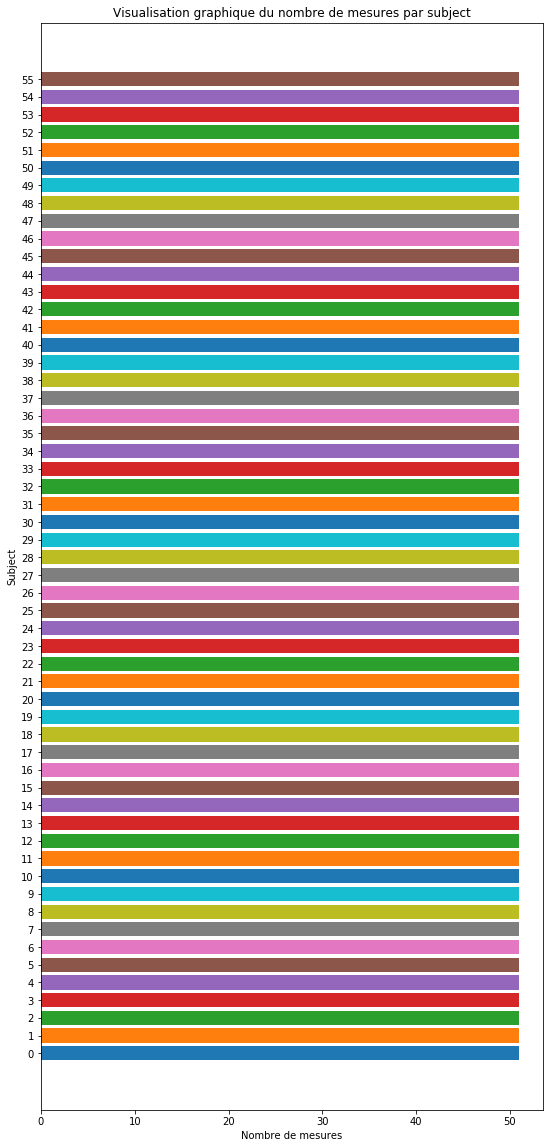

In [169]:
plt.figure(figsize=(9,20))
plt.title('Visualisation graphique du nombre de mesures par subject')
plt.ylabel('Subject')
plt.xlabel('Nombre de mesures')
plt.barh(range(56),df.Subject.value_counts(), color=sns.color_palette(n_colors=56))
plt.yticks(range(56))
plt.show()

In [170]:
### Visualisation de la matrice de corrélation

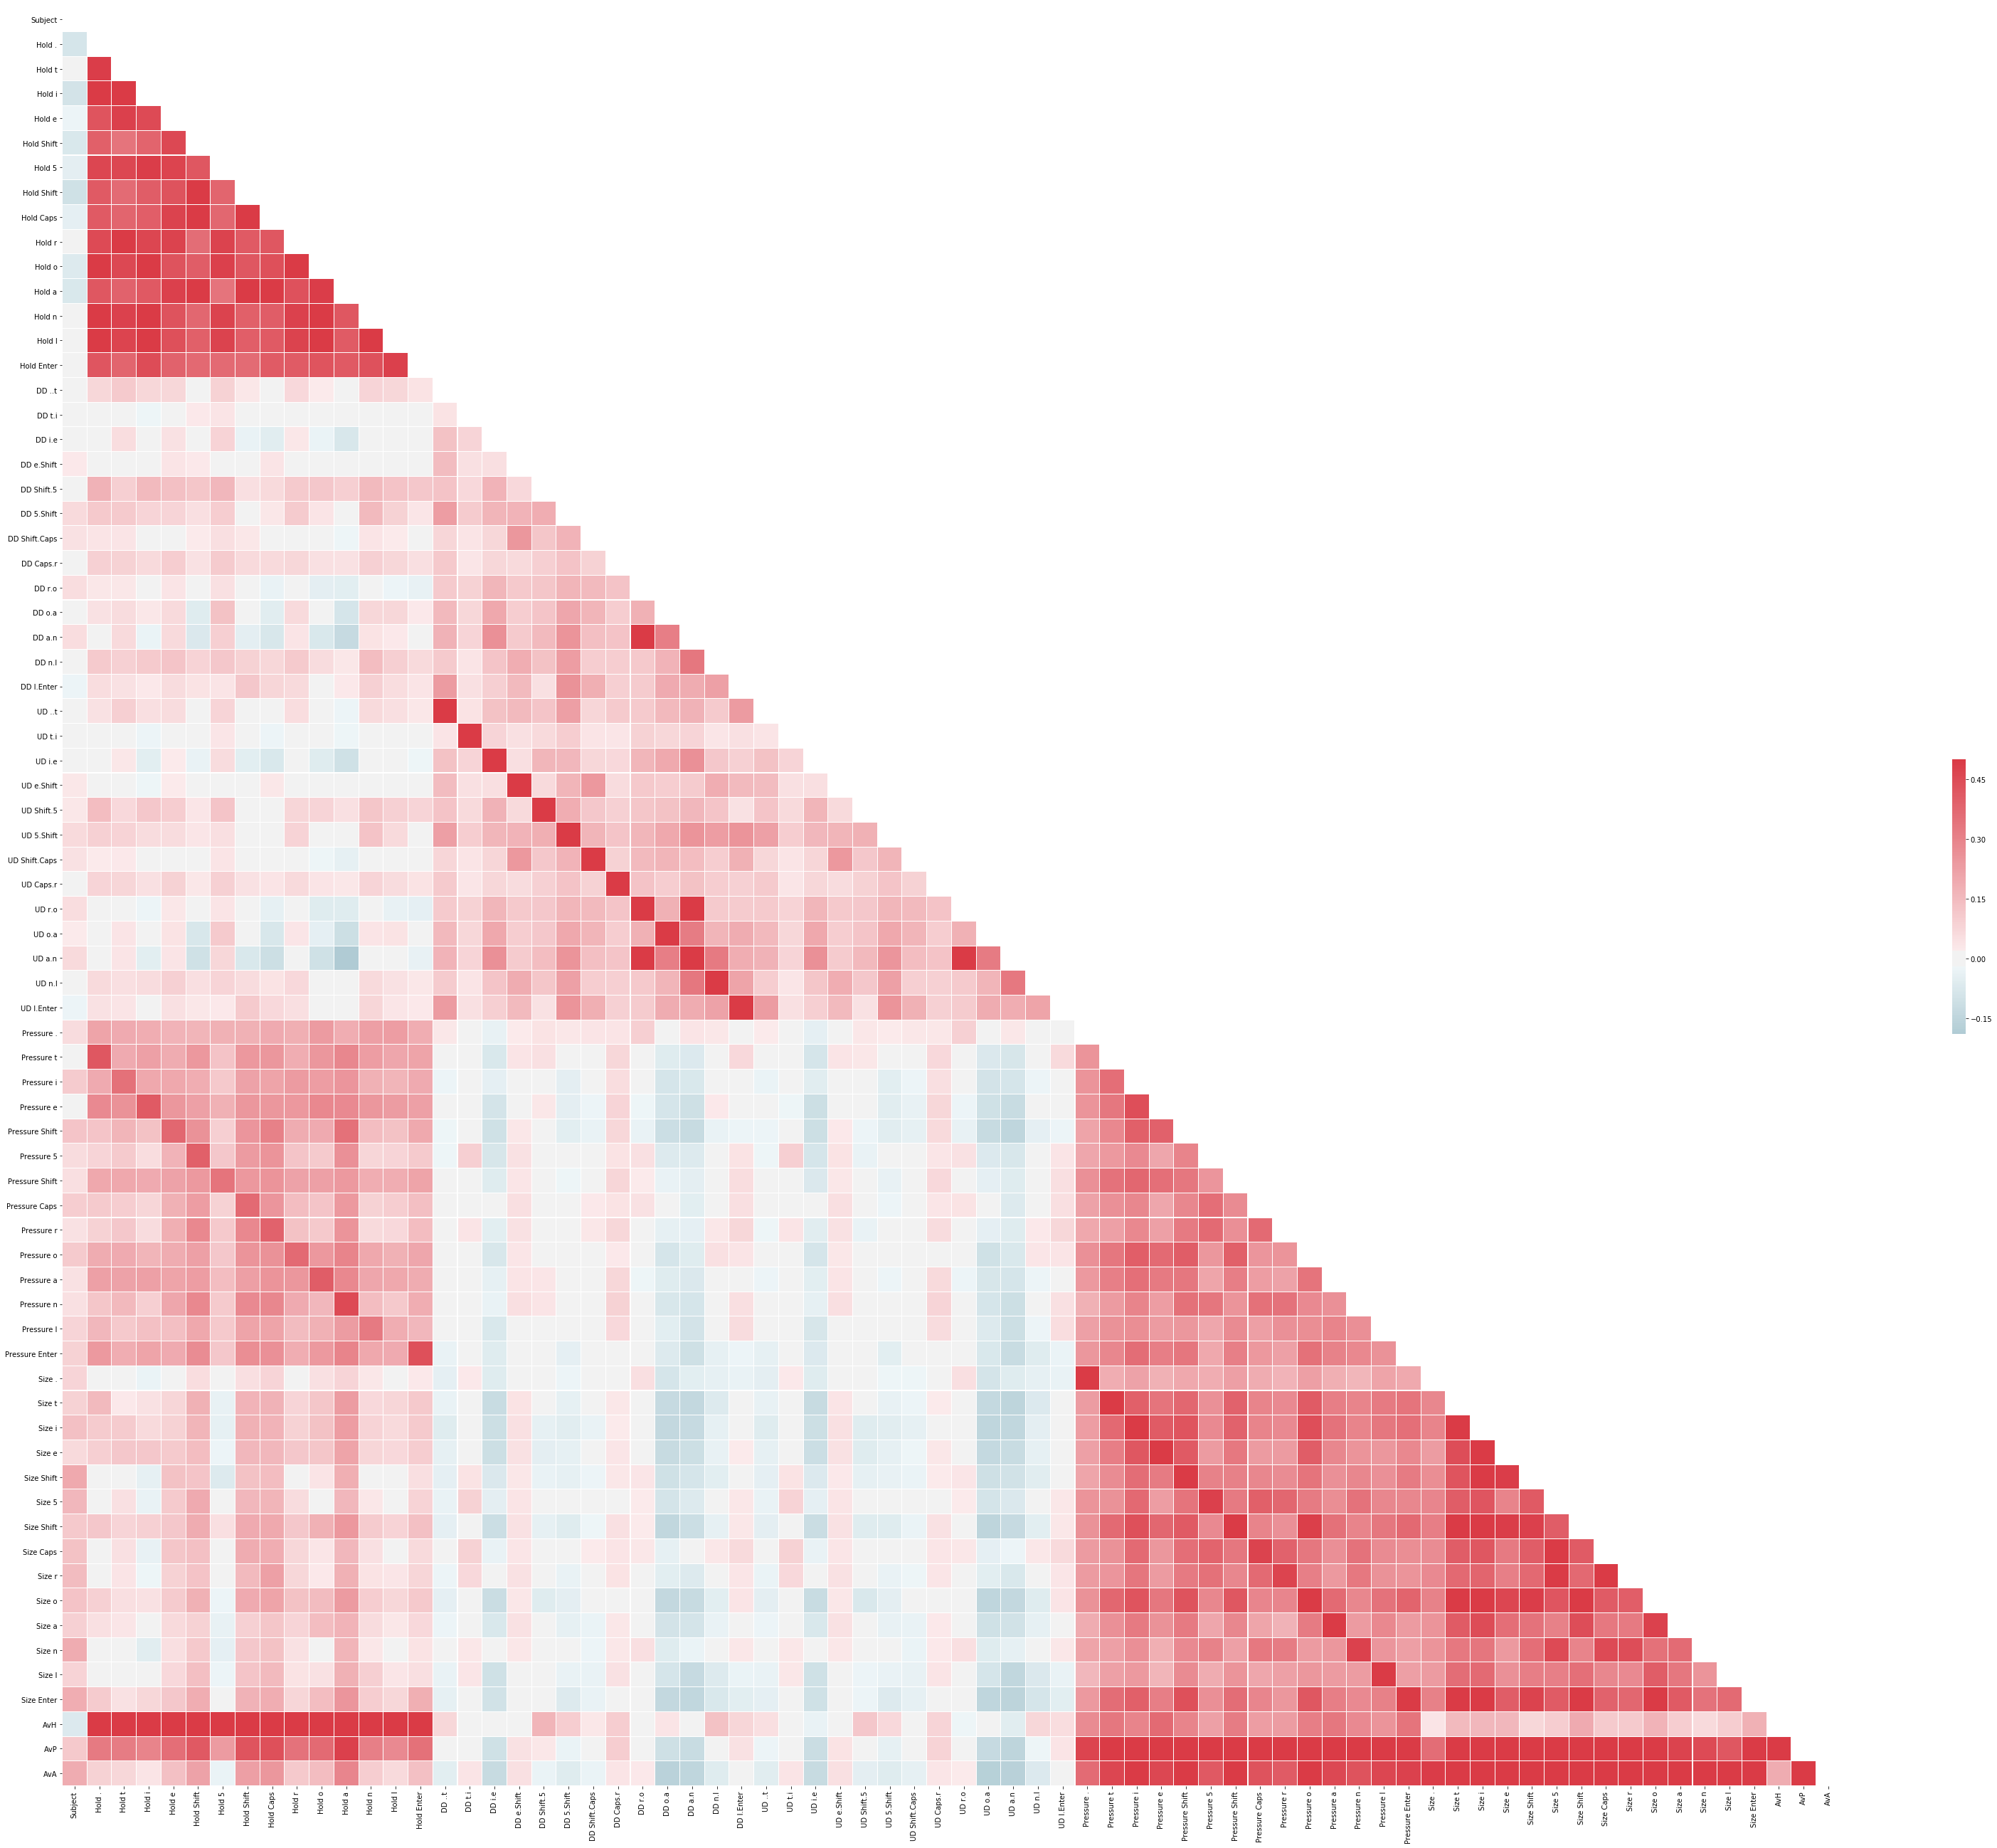

In [171]:
# Convertir les données en float
df = dfs.astype(float)

# Mise en place de la matrice de coorélation
corr                             = df.corr()
mask                             = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax                            = plt.subplots(figsize=(56,71))
cmap                             = sns.diverging_palette(220, 10, as_cmap=True)

# Visualisation de la matrice
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, center=0, square=True, linewidths=.1, cbar_kws={"shrink": .1})

On a bien une coorélation entre les differents mesures de Hold, Pressure et Finger-Area avec leurs moyennes

On a bien un corrélations aussi avec les différentes mesures des Hold

# Modélisation

### Definition du modèle

In [183]:
X = df.drop("Subject", axis="columns")
Y = df["Subject"].astype(int)

### Création d'un jeu de test et d'apprentissage

In [184]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25)
X_train.shape, X_test.shape

((2142, 71), (714, 71))

### Entrainer le modèle : Choix sur une RandomForestClassifier

In [185]:
algo = RandomForestClassifier()

In [186]:
modele = algo.fit(X_train, y_train)

In [190]:
print("\n Accuracy: %.3f pour ce modèle\n" % (modele.score(X_test, y_test)*100.0))


 Accuracy: 79.132 pour ce modèle



# Optimisation des hyperparamètres (grid search)

In [193]:
# utilisation d'une grille complete avec toutes les parametres jugés nécessaires

param_grid = {
    "n_estimators": [10,20,71],
    "bootstrap": [False],
    "criterion": ["gini", "entropy"],
    "min_samples_split" : [3,7, 10],
    "max_depth" :range(10)[1:],
    "max_features": ['auto', 'sqrt']
}

# afficher les 3 meilleures resultats de notre grid search ainsi que le temps effectué

def rapport(resultat, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(resultat['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  resultat['mean_test_score'][candidate],
                  resultat['std_test_score'][candidate]))
            print("Parameters: {0}".format(resultat['params'][candidate]))
            print("")


# Effectuer grid search
grid_search = GridSearchCV(algo, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X,Y)

print("La GridSearchCV met %.2f secondes pour afficher les %d candidats pour l'optimisation des hyperparametres."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

La GridSearchCV met 929.75 secondes pour afficher les 324 candidats pour l'optimisation des hyperparametres.
Model with rank: 1
Mean validation score: 0.882 (std: 0.047)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 71}

Model with rank: 2
Mean validation score: 0.880 (std: 0.036)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 71}

Model with rank: 3
Mean validation score: 0.878 (std: 0.044)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 7, 'n_estimators': 71}



# Optimisation du modèle

In [196]:
hyperparametres = {
    'bootstrap': False, 
    'criterion': 'entropy', 
    'max_depth': 9, 
    'max_features': 'auto', 
    'min_samples_split': 3, 
    'n_estimators': 71
}

algo2 = RandomForestClassifier(**hyperparametres)

newModele = algo2.fit(X_train, y_train)

print("\nAccuracy: %.3f pour ce modele optimisé\n" % (newModele.score(X_test, y_test)*100.0))


Accuracy: 90.196 pour ce modele optimisé



# ROC 

Roc est n'inutile ici car on a un problème multi class et que la ROC est faite pour les problèmes à classification binaire

# API



### Sauvegarder le modele 

In [326]:
with open('Api/modele.ckpt', 'wb') as file:
    pickle.dump(newModele, file)

### Creation d'une instance de tests pour api sous forme d'une feuille excel

In [325]:
X_test.to_csv('Api/data.csv')